In [23]:
import numpy as np
import pandas as pd

import pydataset
import sklearn.preprocessing

# Scaling

- why? 
    1. visualization (when the audience are data scientists)
    2. to get a normal distribution, usually stats tests
    3. modeling
- when?
    1. prep / exploration (concerning ds pipeline)
    2. when we have to  (don't scale for the sake of scaling; original units will be more meaningful if they can be related to one another)
    3. log transformation

In [2]:
df = pydataset.data("sat.act")
df

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0
...,...,...,...,...,...,...
39915,1,3,25,30,500,500.0
39937,1,4,40,27,613,630.0
39951,2,3,24,31,700,630.0
39961,1,4,35,32,700,780.0


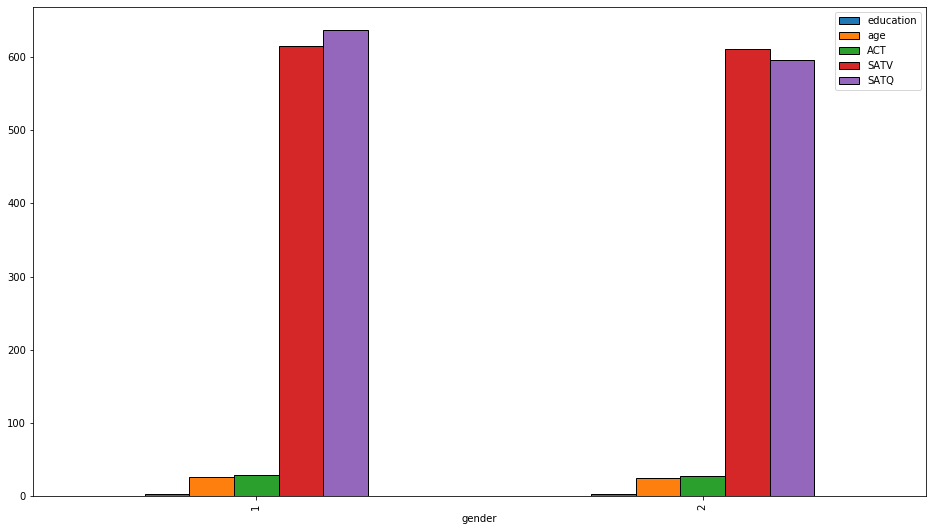

In [4]:
df.groupby("gender").mean().plot.bar(figsize=(16, 9), ec="black")

## Train Test Split

Purpose: Get an idea of how our model performs with unseen data

In [5]:
from sklearn.model_selection import train_test_split

2 Ways to Train Test Split:

1. 2 separate train and test datasets
2. Split our data in to X and Y, and have 4 datasets: X_train, y_train, X_test, y_test


Note:
    - Capital "X" is multidemensional
    - Lower-case "y" is typically a singluar variable we are trying to predict 

In [6]:
mpg = pydataset.data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [16]:
# train, test = train_test_split(mpg)
train, test = train_test_split(mpg, train_size=.8, random_state=56) # random_state argument ensures reproducibility 

print("# of rows in train", train.shape[0])
print("% of train:", train.shape[0] / mpg.shape[0])
print("# of rows in test", test.shape[0])
print("% of test:", test.shape[0] / mpg.shape[0])

# of rows in train 187
% of train: 0.7991452991452992
# of rows in test 47
% of test: 0.20085470085470086


In [17]:
train

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
117,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
145,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
64,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
163,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
193,toyota,camry solara,3.3,2008,6,auto(s5),f,18,27,r,compact
144,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize


>Train test splits are randomized

In [22]:
X = mpg[["cyl", "displ"]]
y = mpg["hwy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

X_train: (175, 2)
X_test: (59, 2)
y_train: (175,)
y_test: (59,)


In [19]:
y_train # is a series

180    29
222    44
225    26
131    15
137    18
       ..
99     20
221    24
67     17
127    12
110    27
Name: hwy, Length: 175, dtype: int64

In [20]:
X_train # is a DataFrame

,cyl,displ
180,4,2.2
222,4,1.9
225,4,2.0
131,8,4.0
137,8,5.4
...,...,...
99,8,5.4
221,6,2.8
67,8,4.7
127,8,4.7


MinMax Scaling

0-1

In [24]:
x = pd.Series([-4, -2, 1, 16])
print(x)

(x - x.min()) / (x.max() - x.min())

0    -4
1    -2
2     1
3    16
dtype: int64


0    0.00
1    0.10
2    0.25
3    1.00
dtype: float64

>When scaling, scaling parameters (e.g. min and max in min-max scaling) should be learned from the training dataset, then applied to the test dataset.

3. Linear Scaling
    - MinMax: everything between 0 and 1

- linear: we anticipate that linear scaling will not change the test statistics
- non-linear: we anticipate that non-linear scaling will change the test statistics